<a href="https://colab.research.google.com/github/KCollins/along-path/blob/main/Correlation_example_4_CCW_Morse_elements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation example #4: Simulation of a Morse code element
Begin at "**Start Here** below.

Localize Morse string as a recovered sinusoid in time.
Using the beacon text at 800 Hz.

Started 13 March 2023, DK


Simulate samplng at 20,000 samples per second. Make signal vector of 1 second to start.
20000 elements, initialize to zero.
Create a signal at noted time in seconds past beginning of samples.
Make a template vector.
Run the correlation (create correlation vector, take the progressing inner products)
Graph the resulting correlation.


Add noise to the signal with the pulse, try again to locate the pulse using correlation.

.wave file goes to /content/C:\temp\Morse.wav

In [ ]:
"""
Python class to generate waveform template from string
Turns self.Morse_String into keying template and waveform numpy array, plus .wav file.
TODO: Setter method for Morse_String, sampling_rate, elem_time (or WPM)
2023-03-14
DK

To use:
Instantiate object, say,
  Mc=Morse_char("W8EDU/B EN91MM CCW")
Create a template with that:
  Mc.make_template_array()
Access the resulting template:
  Mc.get_template()
That will return a numpy array with the template signal at frequency determined by freqtemp, nominally 800 Hz.

"""
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi

# will want paramters of code element time, sampling rate
# for now, one array element per code element.
class Morse_char:

  def __init__(self, Morse_String='CCW W8EDU/B EN91MM'):
    self.Morse_String=Morse_String
    print(self.Morse_String)
    self.Morse_elem_string=''
    self.Morse_Character=''
    self.Morse_elem=''
    self.tmplt=np.zeros(0)
    self.sin_tmplt=np.zeros(0, dtype=float)

    self.sampling_rate=20000 # samples per second
    self.elem_time=0.1       # seconds; 0.1 seconds = 12 WPM.  Could use other speeds; 2**n * 12 WPM most convenient for coding.
    self.freqtemp = 800.     # Hz for template audio frequency

  # Create numpy array of 0/1 for space/mark
  def make_template_array(self):
    array_elems=int(self.elem_time*self.sampling_rate) # number of array points in one Morse element
    space_templ=np.zeros(array_elems, dtype=float) # One space
    mark_templ=np.ones(array_elems, dtype=float)   # One mark
    mark2_templ=np.ones(array_elems*2, dtype=float)# Two marks, used in making dash
    dit_templ=np.append(mark_templ, space_templ)   # end with space
    dash_templ=np.append(mark2_templ,dit_templ)    # append two marks to beginning of dit



    self.create_Morse_elem_string() # Create the string of dots, dashes, spaces from ID string
    print(self.Morse_elem_string, '\n')

    # create array of 1 and 0 for the keying mark and space
    for elem in self.Morse_elem_string: #create array of mark/space from dots and dashes
      if   elem=='.':
        self.tmplt=np.append(self.tmplt, dit_templ)
      elif elem=='-':
        self.tmplt=np.append(self.tmplt, dash_templ)
      elif elem==' ':
        self.tmplt=np.append(self.tmplt, space_templ) # add space to interelement space

    # report timing
    print(self.Morse_String, ' time to send: ', self.tmplt.size/self.sampling_rate, ' seconds') # doesn't work right?

    # fill in sinusoid
    self.sin_tmplt=np.zeros(self.tmplt.size)
    amplitude=2**14 # nearly full .wav size
    for i in range(0,self.tmplt.size):
      if self.tmplt[i]==1:
        self.sin_tmplt[i]=amplitude*sin(2*pi* self.freqtemp * float(i)/self.sampling_rate) # slightly faster than following commented-out line
#        self.sin_tmplt[i] = self.tmplt[i] * 2**13.*sin(2*pi* self.freqtemp * float(i)/self.sampling_rate)

    # plot keying
    fig, ax = plt.subplots(figsize=(20,0.5)) # width, height
    ax.plot(self.tmplt)
    ax.set(xlabel='sample number', ylabel='keying',
          title='Template')
    ax.grid()
    plt.show()

    # plot sinusoid
    fig, ax = plt.subplots(figsize=(20,0.5))
    ax.plot(self.sin_tmplt)
    ax.set(xlabel='sample number', ylabel='Signal',
          title='Template')
    ax.grid()
    plt.show()

  # Create sound file
  def np_to_wav(self):
    print('writing .wav file')
    import scipy.io.wavfile
    scipy.io.wavfile.write("C:\\temp\\Morse.wav", self.sampling_rate, self.sin_tmplt.astype(np.int16))


  # Pop first character from string
  def PopChar(self):
    if len(self.Morse_String)>0:
      self.Morse_Character=self.Morse_String[0]
      self.Morse_String=self.Morse_String[1:]
      return True
      self.tmplt=np.append(self.tmplt, space_templ) # add two spaces to end of each character's Morse
    else:
      self.Morse_Character=''
      return False

  # same but for the Morse elements string
  def PopElem(self):
    if len(self.Morse_elem_string)>0:
      self.Morse_elem=self.Morse_elem_string[0]
      self.Morse_elem_string=self.Morse_elem_string[1:]
      return True
    else:
      self.Morse_elem=''
      return False


  # Turn character into its Morse string
  def Morse_Elements(self, char):
    if char=='A':
      return '.-'
    if char=='B':
      return '-...'
    if char=='C':
      return '-.-.'
    if char=='D':
      return '-..'
    if char=='E':
      return '.'
    if char=='F':
      return '..-.'
    if char=='G':
      return '--.'
    if char=='H':
      return '....'
    if char=='I':
      return '..'
    if char=='J':
      return '.---'
    if char=='K':
      return '-.-'
    if char=='L':
      return '.-..'
    if char=='M':
      return '--'
    if char=='N':
      return '-.'
    if char=='O':
      return '---'
    if char=='P':
      return '.--.'
    if char=='Q':
      return '--.-'
    if char=='R':
      return '.-.'
    if char=='S':
      return '...'
    if char=='T':
      return '-'
    if char=='U':
      return '..-'
    if char=='V':
      return '...-'
    if char=='W':
      return '.--'
    if char=='X':
      return '-..-'
    if char=='Y':
      return '-.--'
    if char=='Z':
      return '--..'
    if char=='1':
      return '.----'
    if char=='2':
      return '..---'
    if char=='3':
      return '...--'
    if char=='4':
      return '....-'
    if char=='5':
      return '.....'
    if char=='6':
      return '-....'
    if char=='7':
      return '--...'
    if char=='8':
      return '---..'
    if char=='9':
      return '----.'
    if char=='0':
      return '-----'
    if char=='.':
      return '.-.-.-'
    if char==',':
      return '--..--'
    if char=='?':
      return '..--..'
    if char=='/':
      return '-..-.'
    if char=='=':
      return '-...-' # BT, pause between thoughts

    if char==' ':
      return ' ' # return space to be added to regular one interelement space
    else:
      return ''  # can fill in a few more characters such as arobase

  def create_Morse_elem_string(self):
    while self.PopChar():
      self.Morse_elem_string = self.Morse_elem_string + self.Morse_Elements(self.Morse_Character) + '  ' # add two spaces

# Getters, setters
  def get_template(self):
    return self.sin_tmplt

  def set_Morse_String(self, MS='AD8Y'):
    self.Morse_String=MS
    # re-initialize everything else
    self.Morse_elem_string=''
    self.Morse_Character=''
    self.Morse_elem=''
    self.tmplt=np.zeros(0)
    self.sin_tmplt=np.zeros(0, dtype=float)
    print(self.Morse_String)


Test code for class Morse_char, above

Prepare some sample templates


N8NFE AD8Y
-.  ---..  -.  ..-.  .     .-  -..  ---..  -.--   

  time to send:  10.5  seconds


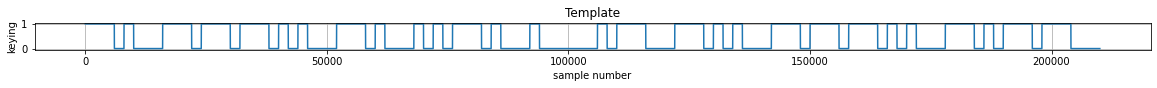

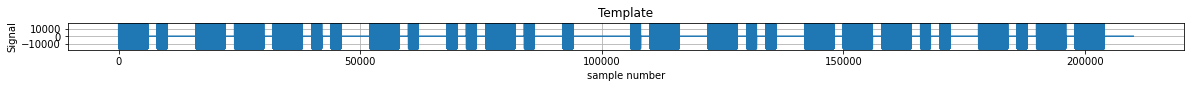

writing .wav file
AD8Y
.-  -..  ---..  -.--   

  time to send:  5.2  seconds


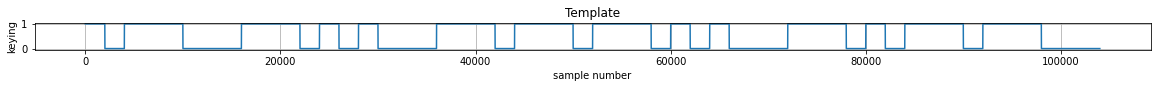

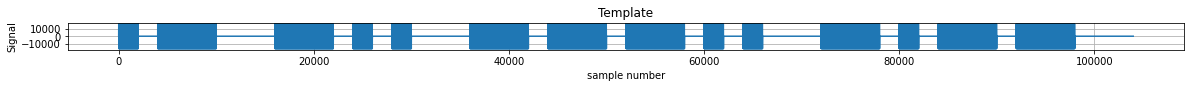

writing .wav file


In [ ]:
# Test code for class Morse_char, above

print('Prepare some sample templates\n\n')
# instantiate Morse_char object
Mc=Morse_char('N8NFE AD8Y')
Mc.make_template_array()
Mc.np_to_wav()

Mc.set_Morse_String('AD8Y')
Mc.make_template_array()
#print(Mc.sin_tmplt)
Mc.np_to_wav()
#Mc.create_Morse_elem_string()
#print(Mc.Morse_elem_string)
#while(Mc.PopChar()):
#  print(Mc.Morse_Character)
#  print(Mc.Morse_Elements(Mc.Morse_Character))
#print('done')



## **Start here.**

Set up the matched filter test.

Import needed libraries, set up some constants

W8EDU/B EN91EM CCW
.--  ---..  .  -..  ..-  -..-.  -...     .  -.  ----.  .----  .  --     -.-.  -.-.  .--   

  time to send:  19.4  seconds


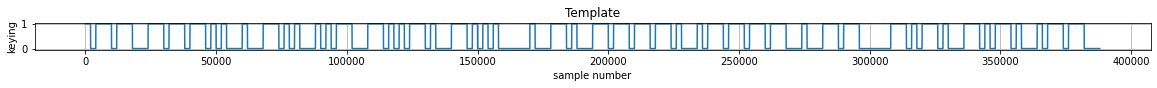

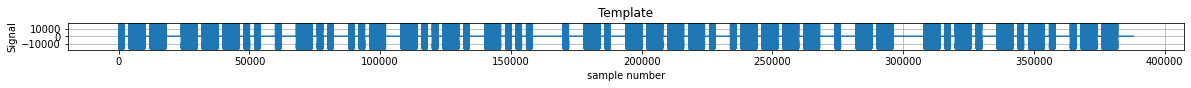

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# use CARC beacon string as template.  Use "CCW" to mark that this is a coherent CW beacon
Mc=Morse_char("W8EDU/B EN91EM CCW")
Mc.make_template_array()
sin_template=Mc.get_template() # will be about 20 seconds

freqsig  = 800. # Hz, NOT YET USED
epoch = 30.     # seconds
sample_rate=20000 # samples per second
T=1/sample_rate   # sample period

template_duration = 30 # seconds
freqtemp = 800. # Hz

# May have some off-by-one errors here

delay = 1.    # seconds, insertion delay for the template into the signal array
idelay= int(delay*sample_rate) # delay in units of samples
itemplate_duration = int(template_duration*sample_rate)  # number of samples in template


Verify can use class above

Create a signal vector of zeros to represent a 30 second epoch.

Create a template vector of "A" with trailing spaces

In [ ]:

# vector to contain signal (eventually with delayed character added)
signal=np.zeros(int(epoch*sample_rate))
template=np.zeros(int(template_duration*sample_rate)

Verify the template with a graph:

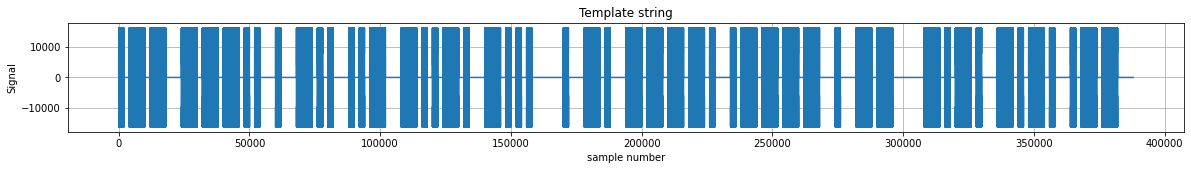

In [ ]:
# show the string in its template vector:
fig, ax = plt.subplots(figsize=(20,2)) # width, height
ax.plot(sin_template)

ax.set(xlabel='sample number', ylabel='Signal',
       title='Template string')
ax.grid()
plt.show()

Insert the template into the signal, delayed to simulate being a distance away from the transmitter.

In [ ]:
offset = int(delay*sample_rate) # offset time in units of samples
signal[offset : offset+sin_template.size]=sin_template # insert the template into the signal array starting at the offset point
print('expect the delay measurement at ', offset, ' samples')

expect the delay measurement at  20000  samples


Graph signal including delayed template

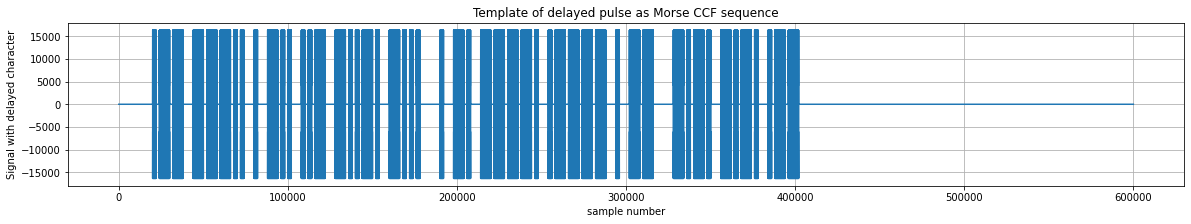

In [ ]:
fig, ax = plt.subplots(figsize=(20,3)) # width, height
ax.plot(signal)

ax.set(xlabel='sample number', ylabel='Signal with delayed character',
       title='Template of delayed pulse as Morse CCF sequence')
ax.grid()
plt.show()

Create a correlation vector, initialize to zero.

Using scipy.signal.correlate.  It uses Fourier method and is faster than numpy's for larger data vectors.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

In [ ]:
import scipy.signal
# scipy.signal version is enormously faster (uses FFT->correlation->inv.FFT)
#correlation= np.correlate(signal, sin_template,  ) # modes valid, same, full.  Valid matches the loops
correlation=scipy.signal.correlate(signal, sin_template, mode='valid')

Plot resulting correlation vector.  Note peak correlation at beginning of pulse in signal vector.
Note that correlation is not normalized--the correlation size scales with the size of the correlation vector.
This could be corrected.  It should peak at 1 for full correlation.

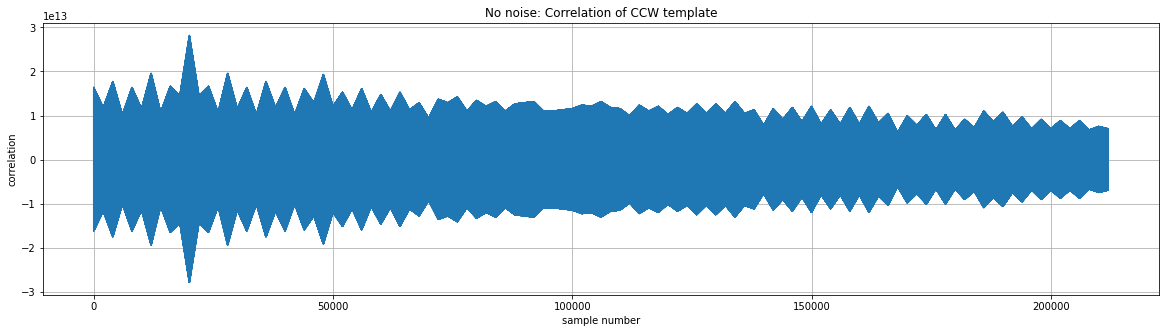

In [ ]:
index = np.arange(0, np.size(correlation))
fig, ax = plt.subplots(figsize=(20,5)) # width, height
ax.plot(index, correlation)

ax.set(xlabel='sample number', ylabel='correlation',
       title='No noise: Correlation of CCW template')

ax.grid()
plt.show()

Add Gaussian noise to each sample:

(try setting the standard deviation to various values.  2 seems to be about the limit for reliable detection of the 1 "volt" signal)

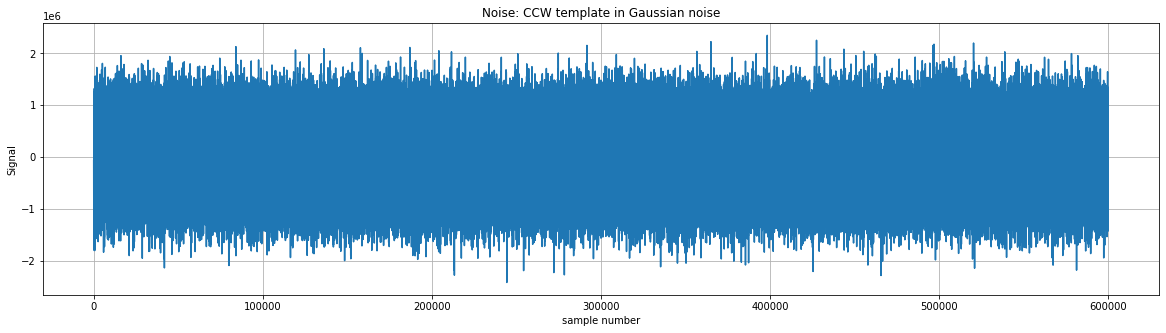

In [ ]:
noise = np.random.normal(0, 500000., signal.size) # (mean, standard deviation, shape)
noisy_signal=signal+noise
# Plot the noisy signal
index = np.arange(0, np.size(signal))
fig, ax = plt.subplots(figsize=(20,5)) # width, height
ax.plot(index, noisy_signal)
ax.set(xlabel='sample number', ylabel='Signal',
       title='Noise: CCW template in Gaussian noise')
ax.grid()
plt.show()

and replot the correlation.

Note that the correlation peak, corresponding to the delay, shows even in severe noise.


In [ ]:
noise_correlation=scipy.signal.correlate(noisy_signal, sin_template, mode='valid')

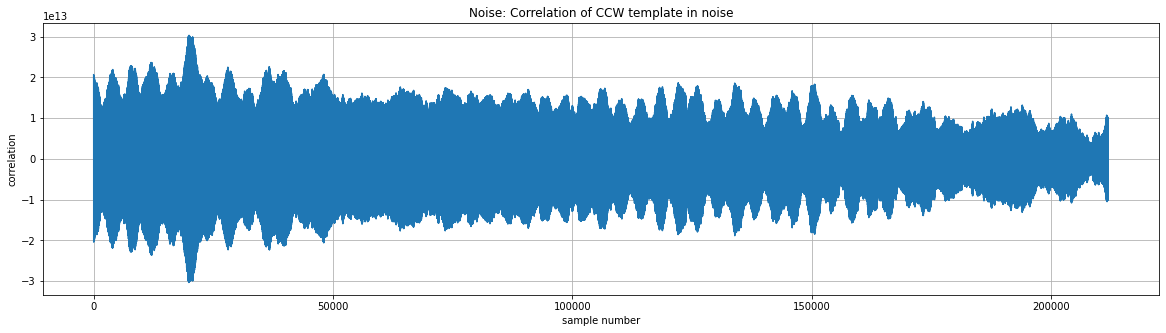

In [ ]:
# Plot the new correlation
index = np.arange(0, np.size(noise_correlation))
fig, ax = plt.subplots(figsize=(20,5)) # width, height
ax.plot(index, noise_correlation)

ax.set(xlabel='sample number', ylabel='correlation',
       title='Noise: Correlation of CCW template in noise')
ax.grid()
plt.show()